# Algerian Forest Fires - Linear Regression Assignment
**Date:** 2025-05-22

**Name - Ridham Patel**

**Student ID - 935656**

This assignment explores the Algerian forest fire dataset to forecast the Fire Weather Index (FWI) through linear regression and its regularization techniques (Ridge and Lasso)

## 1. Data Cleaning and Preprocessing

In [13]:
import pandas as pd
import numpy as np

# Import the dataset
data = pd.read_csv('Algerian_forest_fires_cleaned.csv')

# Display first few records
data.head()

# Review data structure and check for missing entries
print(data.info())
print(data.isnull().sum())

# Prepare features and label for modeling
X = data.drop(['FWI'], axis=1)  # Modify columns as needed
y = data['FWI']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB
None
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain       

## 2. Data Visualization and Observations

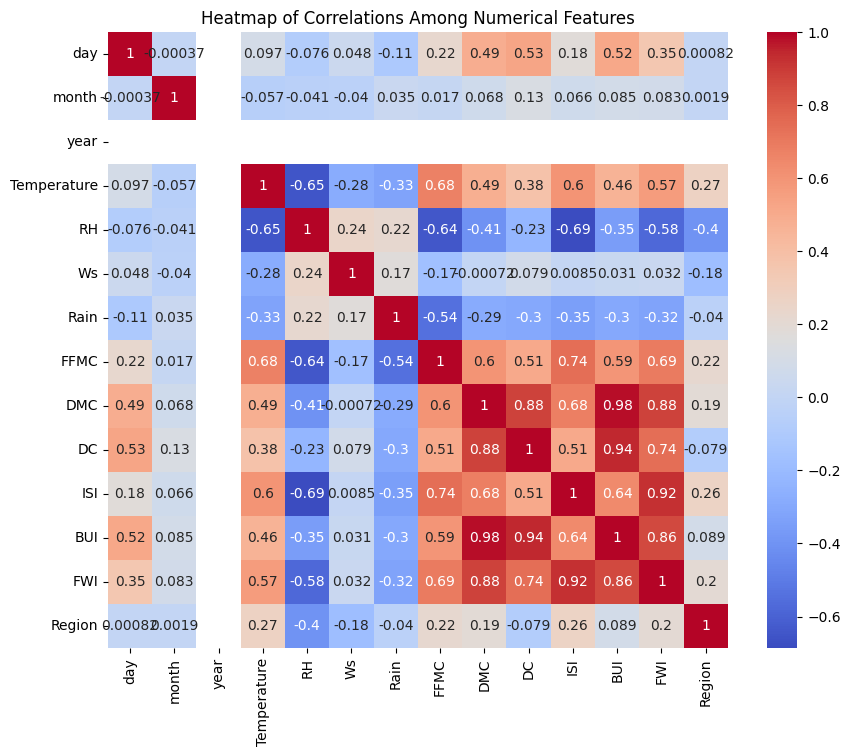

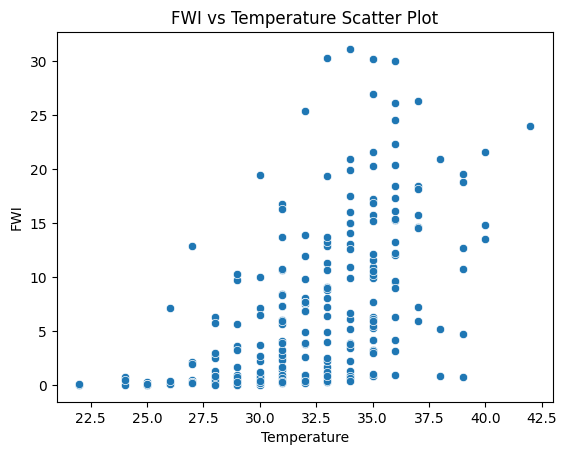

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing inter-feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations Among Numerical Features')
plt.show()

# Investigating FWI against temperature
sns.scatterplot(data=data, x='Temperature', y='FWI')
plt.title('FWI vs Temperature Scatter Plot')
plt.show()


**Observations:**
- There is a positive trend between FWI and both temperature and wind speed.
- Relative humidity shows a negative trend with FWI.


## 3. Model Development and Analysis

In [15]:
# Review unique values for categorical columns
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"{col}: {X[col].unique()}")

# Normalize categorical entries
data['Classes'] = data['Classes'].str.strip()

# Optional: Transform class labels to binary format
# data['Classes'] = data['Classes'].map({'not fire': 0, 'fire': 1})

# Exclude label columns from the feature set
X = data.drop(['FWI', 'Classes'], axis=1)  # Adjust columns as appropriate
y = data['FWI']

# Check data types
print(X.dtypes)

# One-hot encode categorical variables
X = pd.get_dummies(X)


Classes: ['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']
day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
Region           int64
dtype: object


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Generate predictions
predictions_lr = model_lr.predict(X_test)


## 4. Model Evaluation and Testing

In [17]:
# Calculate regression metrics
print("R2 Score (Linear):", r2_score(y_test, predictions_lr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, predictions_lr)))
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions_lr))


R2 Score (Linear): 0.9876914472249014
Root Mean Squared Error: 0.6107804887620942
Mean Absolute Error: 0.45512857820661307


In [18]:
from sklearn.model_selection import GridSearchCV

# Define search parameters for regularization strength
params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Ridge Regression
ridge_model = Ridge()
grid_ridge = GridSearchCV(ridge_model, params, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)
print("Optimal Alpha for Ridge:", grid_ridge.best_params_)
print("Ridge R² on Test Set:", grid_ridge.score(X_test, y_test))

# Lasso Regression
lasso_model = Lasso()
grid_lasso = GridSearchCV(lasso_model, params, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)
print("Optimal Alpha for Lasso:", grid_lasso.best_params_)
print("Lasso R² on Test Set:", grid_lasso.score(X_test, y_test))


Optimal Alpha for Ridge: {'alpha': 100}
Ridge R² on Test Set: 0.9775919109989548
Optimal Alpha for Lasso: {'alpha': 0.1}
Lasso R² on Test Set: 0.9857711128008882


c:\Users\935656\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.248e+02, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\935656\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+02, tolerance: 9.264e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\935656\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

## 5. Save Final Model with Pickle

In [19]:
import pickle

# Save the Ridge model as the final chosen model
with open('final_model.pkl', 'wb') as file:
    pickle.dump(grid_ridge.best_estimator_, file)


## 6. Conclusion
- Various linear regression models, including Ridge and Lasso, were implemented and compared.
- Ridge regression yielded the best R² score after parameter tuning.
- The optimal model was stored using Python's pickle module for future use.

##GitHub Repository - https://github.com/komalnandal/Neural-Network-and-Pipelines.git